In [ ]:
!pip install Wordcloud
!pip install Sastrawi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud, STOPWORDS

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.3 MB/s eta 0:00:00


In [ ]:
data = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/Kapita Selekta Fixs/hasil_label.csv', lineterminator='\n')
data.head(17)

,username,text_clean,created_at,polarity_score,Sentiment
0,aan_muba,gubernur jawa tengah ganjar pranowo berkomitme...,Sun Aug 27 22:47:27 +0000 2023,-8,negative
1,aan_muba,ganjar peduli disabilitas gubernur jawa tenga...,Sun Aug 27 22:39:55 +0000 2023,17,positive
2,DPPBMI,dalam tahap akhir masa jabatannya gubernur jaw...,Sun Aug 27 18:30:51 +0000 2023,-14,negative
3,catatankaqihaty,dari desa untuk indoensia ganjar pranowo suks...,Sun Aug 27 17:02:58 +0000 2023,4,positive
4,FurqanIbr64677,ngurus provinsinya aja gak becus sesuai dengan...,Sun Aug 27 16:26:54 +0000 2023,-1,negative
5,MbBolot,dalam masa akhir jabatan sebagai gubernur jawa...,Sun Aug 27 15:45:51 +0000 2023,2,positive
6,MbBolot,gubernurâ jawaâ tengahâ jatengâ ganjarâ pranow...,Sun Aug 27 15:36:05 +0000 2023,6,positive
7,4_gp2024,gubernur jawa tengah ganjar pranowo akan berpa...,Sun Aug 27 14:54:10 +0000 2023,-2,negative
8,Official_SAGA_,ganjar adalah sosok pemimpin yang dekat dengan...,Sun Aug 27 14:20:21 +0000 2023,2,positive
9,__RismaWidiono_,pak yakin bahwa legacy pemerintahannya bisa d...,Sun Aug 27 13:58:43 +0000 2023,-3,negative


In [ ]:
data.shape

(1144, 5)

In [ ]:
# Filter data berdasarkan kolom 'Sentiment' yang sama dengan 'neutral'
data_neutral = data[data['Sentiment'] == 'neutral']

# Hitung jumlah data dengan sentimen 'neutral'
jumlah_neutral = len(data_neutral)

print(f"Jumlah data dengan sentimen 'neutral': {jumlah_neutral}")


Jumlah data dengan sentimen 'neutral': 65


In [ ]:
# Hapus baris-baris yang memiliki nilai 'neutral' di kolom 'Sentiment'
data = data[data['Sentiment'] != 'neutral']


In [ ]:
data.shape

(1079, 5)

In [ ]:
data = data.replace({'positive' :1, 'negative' : 0})
data.head()

,username,text_clean,created_at,polarity_score,Sentiment
0,aan_muba,gubernur jawa tengah ganjar pranowo berkomitme...,Sun Aug 27 22:47:27 +0000 2023,-8,0
1,aan_muba,ganjar peduli disabilitas gubernur jawa tenga...,Sun Aug 27 22:39:55 +0000 2023,17,1
2,DPPBMI,dalam tahap akhir masa jabatannya gubernur jaw...,Sun Aug 27 18:30:51 +0000 2023,-14,0
3,catatankaqihaty,dari desa untuk indoensia ganjar pranowo suks...,Sun Aug 27 17:02:58 +0000 2023,4,1
4,FurqanIbr64677,ngurus provinsinya aja gak becus sesuai dengan...,Sun Aug 27 16:26:54 +0000 2023,-1,0


In [ ]:
data_negatif = data[data['Sentiment'] == 0 ]
data_positif = data[data['Sentiment'] == 1]


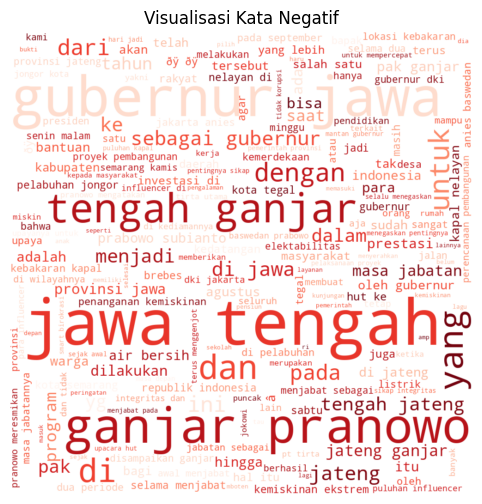

In [ ]:
all_text_s0 =' '.join(word for word in data_negatif['text_clean'])
wordcloud = WordCloud (colormap = 'Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate (all_text_s0)
plt.figure(figsize=(9, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Negatif")
plt.margins(x=0, y=0)
plt.show()

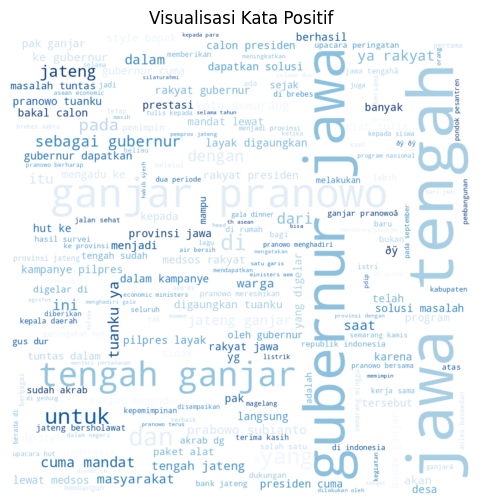

In [ ]:
all_text_s0 =' '.join(word for word in data_positif['text_clean'])
wordcloud = WordCloud (colormap = 'Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate (all_text_s0)
plt.figure(figsize=(9, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Positif")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
data['Sentiment'].value_counts()


1    757
0    322
Name: Sentiment, dtype: int64

In [ ]:
data.head()

,username,text_clean,created_at,polarity_score,Sentiment
0,aan_muba,gubernur jawa tengah ganjar pranowo berkomitme...,Sun Aug 27 22:47:27 +0000 2023,-8,0
1,aan_muba,ganjar peduli disabilitas gubernur jawa tenga...,Sun Aug 27 22:39:55 +0000 2023,17,1
2,DPPBMI,dalam tahap akhir masa jabatannya gubernur jaw...,Sun Aug 27 18:30:51 +0000 2023,-14,0
3,catatankaqihaty,dari desa untuk indoensia ganjar pranowo suks...,Sun Aug 27 17:02:58 +0000 2023,4,1
4,FurqanIbr64677,ngurus provinsinya aja gak becus sesuai dengan...,Sun Aug 27 16:26:54 +0000 2023,-1,0


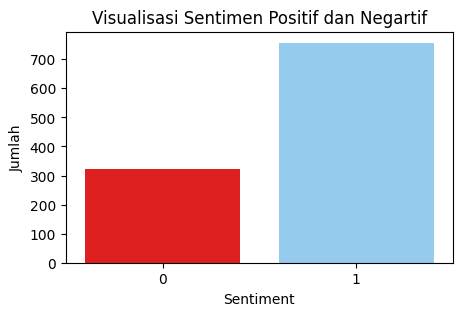

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot( data=data,x='Sentiment',palette={0:"red",1: "lightskyblue"})
plt.title('Visualisasi Sentimen Positif dan Negartif')
plt.xlabel('Sentiment')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
# Pra-pemrosesan data dan pembagian data latih dan data uji
X = data['text_clean']
y = data['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Hitung jumlah data dalam setiap kategori (latih dan uji)
train_counts = y_train.value_counts()
test_counts = y_test.value_counts()

In [ ]:
# Labels untuk sumbu x (kategori)
categories = train_counts.index

In [ ]:
# Jumlah data latih dan data uji
train_data = train_counts.values
test_data = test_counts.values

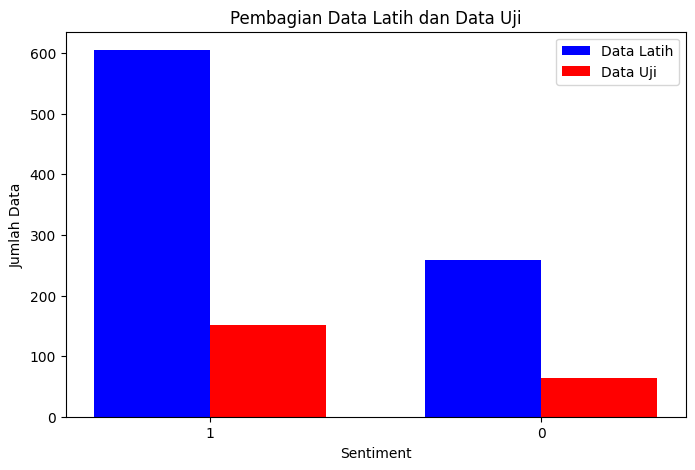

In [ ]:
# Lebar batang dalam diagram
bar_width = 0.35

# Indeks untuk sumbu x
indices = range(len(categories))

# Buat plot diagram batang untuk data latih (biru)
plt.figure(figsize=(8, 5))
plt.bar(indices, train_data, bar_width, label='Data Latih', color='blue')

# Buat plot diagram batang untuk data uji (merah)
plt.bar([i + bar_width for i in indices], test_data, bar_width, label='Data Uji', color='red')

# Atur label sumbu x dan label
plt.xlabel('Sentiment')
plt.ylabel('Jumlah Data')
plt.title('Pembagian Data Latih dan Data Uji')
plt.xticks([i + bar_width / 2 for i in indices], categories)
plt.legend()

# Tampilkan diagram batang
plt.show()
# 1 menunjukan sentiment positif dan 0 sentiment negatif

In [ ]:
# Contoh: Pra-pemrosesan data dengan TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [ ]:
# Inisialisasi dan melatih model Naive Bayes
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
# Prediksi dengan model yang telah dilatih
y_pred = naive_bayes_classifier.predict(X_test_tfidf)

In [ ]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
# Menampilkan hasil evaluasi
print("Akurasi: ", accuracy)
print("Laporan Klasifikasi:\n", classification_rep)

Akurasi:  0.8009259259259259
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.86      0.39      0.54        64
           1       0.79      0.97      0.87       152

    accuracy                           0.80       216
   macro avg       0.83      0.68      0.71       216
weighted avg       0.81      0.80      0.77       216



##Testing

In [ ]:
# Input teks baru dari pengguna
new_text = input("Masukkan teks baru: ")

# Pra-pemrosesan teks baru dengan TF-IDF (menggunakan vectorizer yang sudah dibuat)
new_text_vec = tfidf_vectorizer.transform([new_text])

# Prediksi sentimen pada teks baru
predicted_sentimen = naive_bayes_classifier.predict(new_text_vec)

# Menampilkan hasil analisis sentimen pada teks baru
if predicted_sentimen[0] == 1:
  sentiment_label="positif"
elif predicted_sentimen[0] == 0:
  sentiment_label = "negatif"

# Menampilkan hasil analisis sentimen pada teks baru
print("Hasil Analisis Sentimen pada Teks Baru:", sentiment_label)


Masukkan teks baru: kebakaran kapal di pelabuhan provinsi tanggung jawab siapa
Hasil Analisis Sentimen pada Teks Baru: negatif


In [ ]:
# Input teks baru dari pengguna
new_text = input("Masukkan teks baru: ")

# Pra-pemrosesan teks baru dengan TF-IDF (menggunakan vectorizer yang sudah dibuat)
new_text_vec = tfidf_vectorizer.transform([new_text])

# Prediksi sentimen pada teks baru
predicted_sentimen = naive_bayes_classifier.predict(new_text_vec)

# Menampilkan hasil analisis sentimen pada teks baru
if predicted_sentimen[0] == 1:
  sentiment_label="positif"
elif predicted_sentimen[0] == 0:
  sentiment_label = "negatif"

# Menampilkan hasil analisis sentimen pada teks baru
print("Hasil Analisis Sentimen pada Teks Baru:", sentiment_label)


Masukkan teks baru: jadikan ganjar sebagai bakal calon presiden tahun depan
Hasil Analisis Sentimen pada Teks Baru: positif
